# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *7장 인공신경망기초 코드*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 도전문제 7.1 XOR의 진리표를 이용하여 퍼셉트론을 학습시켜 보자

### LAB 7-5 : XOR 연산이 가능한 다층 퍼셉트론 만들기

In [2]:
import numpy as np
import matplotlib.pyplot as plt

U: 연결강도 $\mathbf U$ 

W: 연결강도 $\mathbf W$

learning_rate: 학습률 $\eta$

In [3]:
U = np.random.rand(3,3)   # 연결강도 
W = np.random.rand(4,2)   # 연결강도 
learning_rate = 1.0       # 학습률 

In [4]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

def derivative_sigmoid(v):
    return v*(1-v)

순전파시 계산될 값들 : $\mathbf h^{\Sigma} ~ \mathbf h^{\phi} ~ \mathbf h^{{\phi}'}$

역전파시 계산될 값들 : $\mathbf e^h ~ \delta^h$


순전파시 계산될 값들 : $\mathbf y^{\Sigma} ~ \mathbf y^{\phi} ~ \mathbf y^{{\phi}'}$

역전파시 계산될 값들 : $ \mathbf e^y ~ \delta^y $

In [5]:
input = np.zeros(3)

# 순전파시 계산될 값들 
h_sum, h_out, h_deriv = np.zeros(4), np.zeros(4), np.zeros(4)
h_sum[0], h_out[0], h_deriv[0] = 1, 1, 1
# 역전파시 계산될 값들 
h_error, h_delta = np.zeros(4), np.zeros(4)                  

# 순전파시 계산될 값들 
y_sum, y_out, y_deriv = np.zeros(2), np.zeros(2), np.zeros(2)
# 역전파시 계산될 값들 
y_error, y_delta = np.zeros(2), np.zeros(2)

은닉층에서 합산된 값: $\mathbf h^{\Sigma} = \mathbf U^{\mathrm T} \mathbf x$

은닉층의 활성화 값: $\mathbf h^{\phi} = \phi(\mathbf h^{\Sigma})$

은닉층 활성화 미분치: $\mathbf h^{{\phi}'} = \phi'(\mathbf h^{\Sigma})$

In [6]:
def forward_xh(x):
    global input, h_sum, h_out, h_deriv
    input = np.append(1, x) # 입력 벡터의 첫번째 항은 bias 노드로 1을 대입함. 벡터 input=[1, x1, x2]
    t_sum = U.T.dot(input)# 은닉층에서 합산된 값
    h_sum = np.append(1,t_sum) # h_sum 벡터의 첫번째 원소는 입력벡터와 가중치 곱으로 계산이 안됨
    h_out = sigmoid(h_sum)  # 은닉층의 활성화 값. h_out = [1, h1, h2, h3]
    h_out[0] = 1  #은닉층의 첫번째 노드는 bias 노드임으로 출력값을 1로 설정
    h_deriv = derivative_sigmoid(h_out)    # 은닉층 활성화 미분치

출력층에서 합산된 값: $\mathbf y^{\Sigma} = \mathbf W^{\mathrm T} \mathbf x$

출력층의 활성화 값: $\mathbf y^{\phi} = \phi(\mathbf y^{\Sigma})$

출력층 활성화 미분치: $\mathbf y^{{\phi}'} = \phi'(\mathbf y^{\Sigma})$

In [7]:
def forward_hy():
    global y_sum, y_out, y_deriv
    y_sum = W.T.dot(h_out)                  # 출력층에서 합산된 값
    y_out = sigmoid(y_sum)                  # 출력층의 활성화 값
    y_deriv = derivative_sigmoid(y_out)    # 출력층의 활성화 미분치

오차 계산: $ \mathbf y^{\phi} - \mathbf t$

In [8]:
def compute_error(target):
    return y_out - target                  # 오차의 계산

출력층 오차 : $\mathbf e^y$

출력층에서 보내는 델타: $\delta^y = \mathbf y^{{\phi}'} \otimes \mathbf e^y$

연결강도 갱신: $\Delta \mathbf W = \eta \mathbf h^{\phi} {\delta^y}^{\mathrm T}$

In [9]:
def backward_y(error):
    global y_error, y_delta, W
    y_error = error                                    # 출력층 오차
    y_delta = y_deriv * y_error                        # 출력층에서 보내는 델타
    ## 연결강도 W 수정
    dW = - learning_rate * np.outer(h_out, y_delta)    # 연결강도 갱신: 은닉층 출력과 출력층 델타의 외적
    W = W + dW   

은닉층 오차 : $\mathbf e^h = \mathbf W \delta^y$

은닉층에서 보내는 델타: $\delta^h = \mathbf h^{{\phi}'} \otimes \mathbf e^h$

연결강도 갱신: $\Delta \mathbf U = \eta \mathbf x^{\phi} {\delta^h}^{\mathrm T}$

In [13]:
def backward_h():
   global h_error, h_delta, U
   h_error = W.dot(y_delta)                             # 은닉층 오차
   h_delta = h_deriv * h_error                          # 은닉층 오차를 입력측에 전달하기 위한 델타
   t_delta = np.delete(h_delta,0) #h_delta 벡터의 첫 번째 원소는 bias 항임으로 입력층으로 전달되지 않음
   
## 연결강도 U 수정
   dU = - learning_rate * np.outer(input, t_delta)      # 연결강도 갱신
   U = U + dU  

In [11]:
def train(x, target):
    forward_xh(x)
    forward_hy()
    e = compute_error(target)
    backward_y(e)
    backward_h()
    return e**2

In [14]:
loss = []

for i in range(1500):
    e_accum=0
    true = np.array([1,0])
    false = np.array([0,1])
    e_accum += train(np.array([0,0]), false)    # 훈련 데이터 1 
    e_accum += train(np.array([0,1]), true)     # 훈련 데이터 2
    e_accum += train(np.array([1,0]), true)     # 훈련 데이터 3
    e_accum += train(np.array([1,1]), false)    # 훈련 데이터 4
    loss.append(e_accum)

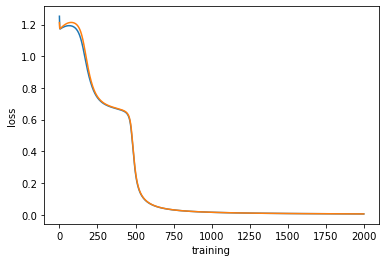

In [204]:
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('training')
plt.show()

In [15]:
def test(X):
    y_hat = []
    for x in X:
        forward_xh(x)
        forward_hy()
        y_hat.append(y_out)
    return y_hat

In [16]:
test(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))

[array([0.02037896, 0.97985464]),
 array([0.96738495, 0.03266338]),
 array([0.9569335 , 0.04283501]),
 array([0.04977395, 0.95035213])]



### LAB 7-6 : 다층 퍼셉트론으로 비선형 회귀 구현하기

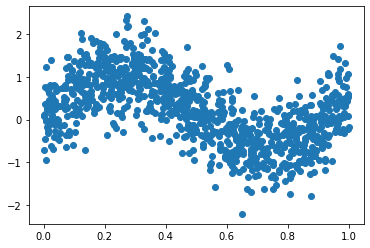

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_loc = './data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
plt.scatter(df['x'], df['y'])

In [18]:
nx, nh1, nh2, ny = 1, 6, 4, 1
U = np.random.randn(nx , nh1)*2
V = np.random.randn(nh1, nh2)*2
W = np.random.randn(nh2, ny)*2
learning_rate = 0.1

In [19]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

In [20]:
input = np.zeros(nx)

h1_out, h1_deriv = np.zeros(nh1), np.zeros(nh1) # 순전파시 계산 - 은닉계층 1
h1_delta = np.zeros(nh1)                        # 역전파시 계산

h2_out, h2_deriv = np.zeros(nh2), np.zeros(nh2) # 순전파시 계산 - 은닉계층 2
h2_delta = np.zeros(nh2)                        # 역전파시 계산

y_out, y_deriv = np.zeros(ny), np.zeros(ny)     # 순전파시 계산 - 출력계층
y_delta = np.zeros(ny)                          # 역전파시 계산

In [21]:
def forward(x):
    global input, h1_out, h1_deriv, h2_out, h2_deriv, y_out, y_deriv
    input = x
    h1_out = sigmoid ( U.T.dot(input) )          # 은닉계층 1로 전파
    h1_deriv = h1_out * (1 - h1_out)             # 은닉계층 1의 미분

    h2_out = sigmoid ( V.T.dot(h1_out) )         # 은닉계층 2로 전파
    h2_deriv = h2_out * (1 - h2_out)             # 은닉계층 2의 미분
  
    y_out = sigmoid( W.T.dot(h2_out) )           # 출력계층으로 전파
    y_deriv = y_out * (1 - y_out)                # 출력계층의 미분

In [22]:
def compute_error(target):
    return y_out - target

In [23]:
def backward(error):
    global y_delta, W, h2_delta, V, h1_delta, U
  
    y_delta = y_deriv * error                         # 출력 계층의 델타
    dW = - learning_rate * np.outer(h2_out, y_delta)  # W의 수정
    W = W + dW
    
    h2_delta = h2_deriv * W.dot(y_delta)              # 은닉 계층 2의 델타
    dV = - learning_rate * np.outer(h1_out, h2_delta) # V의 수정
    V = V + dV
    
    h1_delta = h1_deriv * V.dot(h2_delta)             # 은닉 계층 1의 델타
    dU = - learning_rate * np.outer(input, h1_delta)  # U의 수정
    U = U + dU

In [24]:
def train(x, target):
    forward(x)
    e = compute_error(target)
    backward(e)
    return e**2

In [25]:
loss = []
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
for i in range(200): # 200 epoch을 수행
    e_accum = 0
    for x, y in zip(X, y_label): # Stochastic Gradient Descent Method 수행
        e_accum += train(x, y)
    loss.append(e_accum)

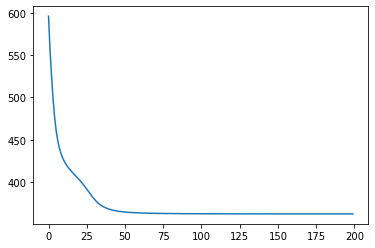

In [243]:
err_log = np.array(loss).flatten()
plt.plot(err_log)
plt.show()

In [26]:
def predict(X):
    y_hat = []
    for x in X:
        forward(x)
        y_hat.append(y_out)
    return y_hat

[[0.        ]
 [0.01010101]
 [0.02020202]
 [0.03030303]
 [0.04040404]
 [0.05050505]
 [0.06060606]
 [0.07070707]
 [0.08080808]
 [0.09090909]
 [0.1010101 ]
 [0.11111111]
 [0.12121212]
 [0.13131313]
 [0.14141414]
 [0.15151515]
 [0.16161616]
 [0.17171717]
 [0.18181818]
 [0.19191919]
 [0.2020202 ]
 [0.21212121]
 [0.22222222]
 [0.23232323]
 [0.24242424]
 [0.25252525]
 [0.26262626]
 [0.27272727]
 [0.28282828]
 [0.29292929]
 [0.3030303 ]
 [0.31313131]
 [0.32323232]
 [0.33333333]
 [0.34343434]
 [0.35353535]
 [0.36363636]
 [0.37373737]
 [0.38383838]
 [0.39393939]
 [0.4040404 ]
 [0.41414141]
 [0.42424242]
 [0.43434343]
 [0.44444444]
 [0.45454545]
 [0.46464646]
 [0.47474747]
 [0.48484848]
 [0.49494949]
 [0.50505051]
 [0.51515152]
 [0.52525253]
 [0.53535354]
 [0.54545455]
 [0.55555556]
 [0.56565657]
 [0.57575758]
 [0.58585859]
 [0.5959596 ]
 [0.60606061]
 [0.61616162]
 [0.62626263]
 [0.63636364]
 [0.64646465]
 [0.65656566]
 [0.66666667]
 [0.67676768]
 [0.68686869]
 [0.6969697 ]
 [0.70707071]
 [0.71

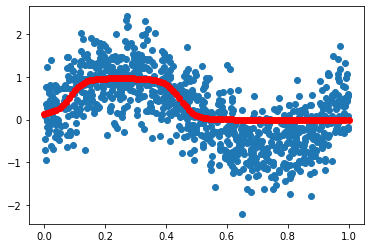

In [27]:
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
print(domain)
y_hat = predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

### 7.11 신경망을 쉽게 설계하고 훈련을 실시할 수 있는 도구 활용

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로우와 케라스를 사용할 수 있도록 준비
import tensorflow as tf
from tensorflow import keras

In [29]:
model = keras.models.Sequential( [
    keras.layers.Dense(6, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(1, activation= 'sigmoid'),
])

In [30]:
optimizer = keras.optimizers.SGD(learning_rate=5.0)
model.compile(optimizer=optimizer, loss='mse')

In [31]:
data_loc = './data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()

In [32]:
model.fit(X, y_label, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 436us/step - loss: 0.6197
Epoch 2/100
32/32 [==============================] - 0s 436us/step - loss: 0.6285
Epoch 3/100
32/32 [==============================] - 0s 468us/step - loss: 0.6117
Epoch 4/100
32/32 [==============================] - 0s 499us/step - loss: 0.5745
Epoch 5/100
32/32 [==============================] - 0s 530us/step - loss: 0.5048
Epoch 6/100
32/32 [==============================] - 0s 405us/step - loss: 0.4450
Epoch 7/100
32/32 [==============================] - 0s 467us/step - loss: 0.4219
Epoch 8/100
32/32 [==============================] - 0s 468us/step - loss: 0.4152
Epoch 9/100
32/32 [==============================] - 0s 462us/step - loss: 0.4177
Epoch 10/100
32/32 [==============================] - 0s 499us/step - loss: 0.4104
Epoch 11/100
32/32 [==============================] - 0s 499us/step - loss: 0.4053
Epoch 12/100
32/32 [==============================] - 0s 530us/step - loss: 0.4099
Epoch 13/100


32/32 [==============================] - 0s 467us/step - loss: 0.3633
Epoch 100/100
32/32 [==============================] - 0s 467us/step - loss: 0.3647


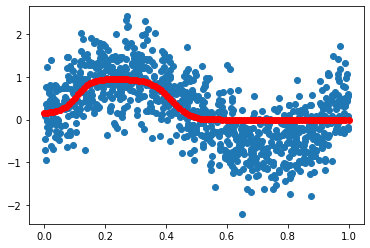

In [254]:
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')